1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

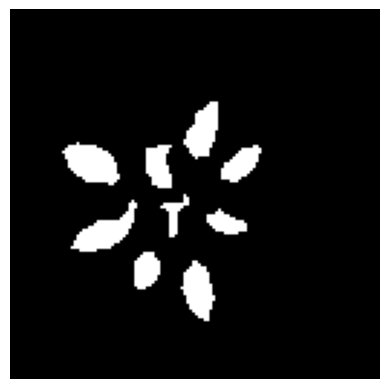

In [ ]:
import cv2
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
import random
import os
import matplotlib.pyplot as plt

# the coefficient takes values in [0, 1], where 0 is the worst score, 1 is the best score
# the dice coefficient of two sets represented as vectors a, b ca be computed as (2 *|a b| / (a^2 + b^2))
def dice_coefficient(y_true, y_pred):
    eps = 1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f * y_true_f) + K.sum(y_pred_f * y_pred_f) + eps)

model_path_ = os.path.join(r'C:\Users\KiloO\Deep-image-processing\Seance4\Exercice-4\LEAF_best.keras')
model_New = tf.keras.models.load_model(model_path_,custom_objects={'dice_coefficient': dice_coefficient})
img_ = imread(r'C:\Users\KiloO\Deep-image-processing\Seance4\Exercice-4\img_1.png')

_, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = list(model_New.input.shape)

img_ = img_[:,:,:IMG_CHANNELS]
X = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
h_or, w_or, _ = img_.shape
ORIGIN = np.zeros((1, h_or, w_or, IMG_CHANNELS), dtype=np.uint8)
ORIGIN[0] = img_
img = resize(img_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
X[0] = img

preds_test = model_New.predict(X, verbose=1)
# we apply a threshold on predicted mask (probability mask) to convert it to a binary mask.
preds_test_opt = (preds_test > 0.2).astype(np.uint8)

result_ = np.squeeze(preds_test_opt[0, :, :, 0])
mask = np.zeros((1,h_or,w_or), dtype=np.uint8)
res_ = resize(result_, (h_or, w_or), mode='constant', preserve_range=True)
mask[0] = res_
mask_output = mask[0,:,:]

plt.imshow(mask_output,cmap='gray')
plt.axis('off')